In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Reading data

In [33]:
df = pd.read_csv("../data/Loan_default.csv")

**Features**
1. LoanID = A unique identifier for each loan
2. Age = The age of the borrower
3. Income = The annual income of the borrower
4. LoanAmount = The amount of money being borrowed
5. CreditScore = The credit score of the borrower, indicating their creditworthiness
6. MonthsEmployed = The number of months the borrower has been employed
7. NumCreditLines = The number of credit lines the borrower has open
8. InterestRate = The interest rate for the loan
9. LoanTerm = The term length of the loan in months
10. DTIRatio = The Debt-to-Income ratio, indicating the borrower's debt compared to their income
11. Education = The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School)
12. EmploymentType = The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed)
13. MaritalStatus = The marital status of the borrower (Single, Married, Divorced)
14. HasMortgage = Whether the borrower has a mortgage (Yes or No)
15. HasDependents = Whether the borrower has dependents (Yes or No)
16. LoanPurpose = The purpose of the loan (Home, Auto, Education, Business, Other)
17. HasCoSigner = Whether the loan has a co-signer (Yes or No)
18. Default = The binary target variable indicating whether the loan defaulted (1) or not (0)


**Looking for more information of the data**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [19]:
df.shape

(255347, 18)

In [20]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [21]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [25]:
df.duplicated().sum()

np.int64(0)

In [28]:
# Handling missing values

# for numeric columns (replacing missing value with median)
numeric_cols =df.select_dtypes(include=['number']).columns
df[numeric_cols] =df[numeric_cols].fillna(df[numeric_cols].median())

#for string columns (replacing missing value with "UNKNOW")
categorical_cols =df.select_dtypes(include=['object']).columns
df[categorical_cols] =df[categorical_cols].fillna('Unknown')

  # Exploratory Data Analysis

In [39]:
# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

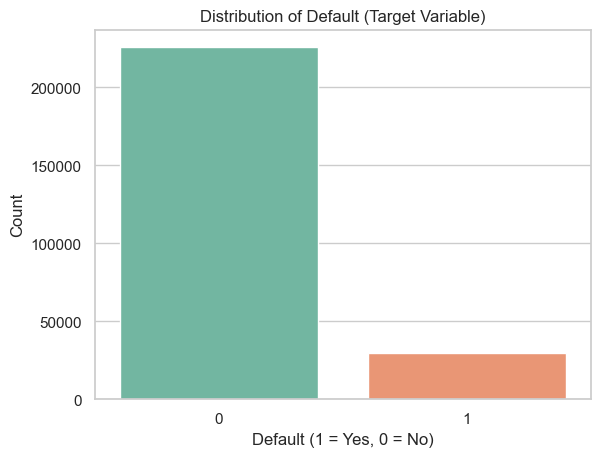

In [37]:
# 1. Target variable distribution
sns.countplot(data=df, x='Default', hue='Default', palette='Set2', legend=False)
plt.title("Distribution of Default (Target Variable)")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

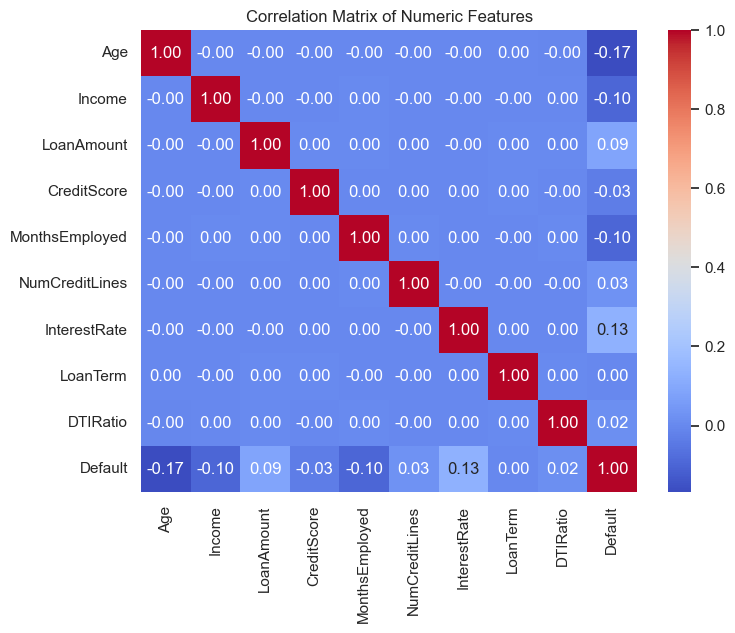

In [41]:
# 2. Correlation heatmap (numeric features only)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

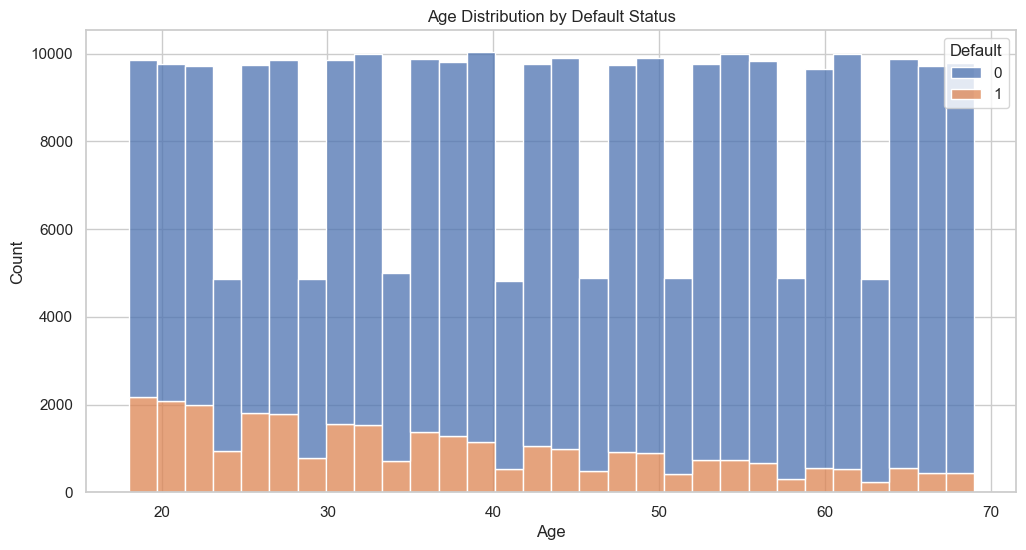

In [42]:
# 3. Age distribution by default status
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Default', multiple='stack', bins=30)
plt.title("Age Distribution by Default Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

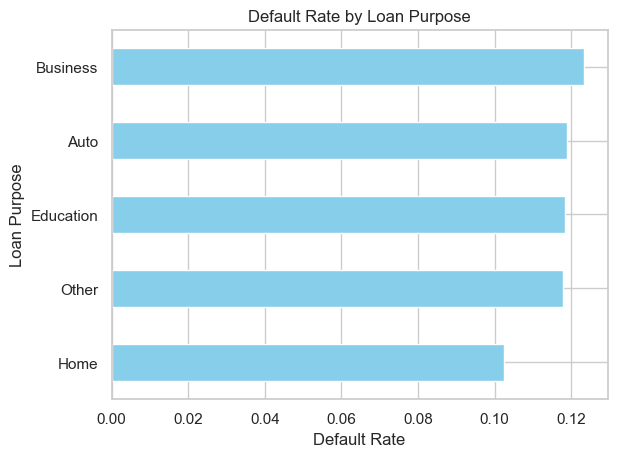

In [43]:
# 4. Default rate by loan purpose
loan_purpose_rate = df.groupby('LoanPurpose')['Default'].mean().sort_values()
loan_purpose_rate.plot(kind='barh', color='skyblue')
plt.title("Default Rate by Loan Purpose")
plt.xlabel("Default Rate")
plt.ylabel("Loan Purpose")
plt.show()

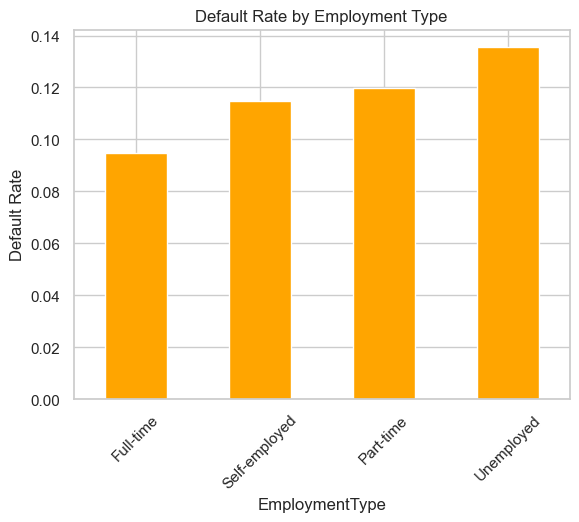

In [44]:
# 5. Default rate by employment type
employment_rate = df.groupby('EmploymentType')['Default'].mean().sort_values()
employment_rate.plot(kind='bar', color='orange')
plt.title("Default Rate by Employment Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()

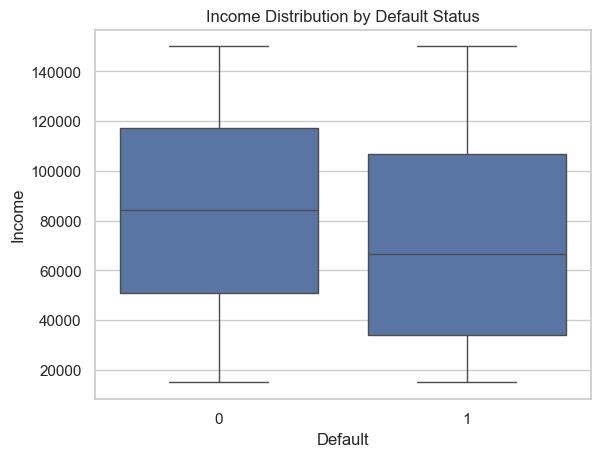

In [45]:
# 6. Income vs. Default using boxplot
sns.boxplot(data=df, x='Default', y='Income')
plt.title("Income Distribution by Default Status")
plt.xlabel("Default")
plt.ylabel("Income")
plt.show()

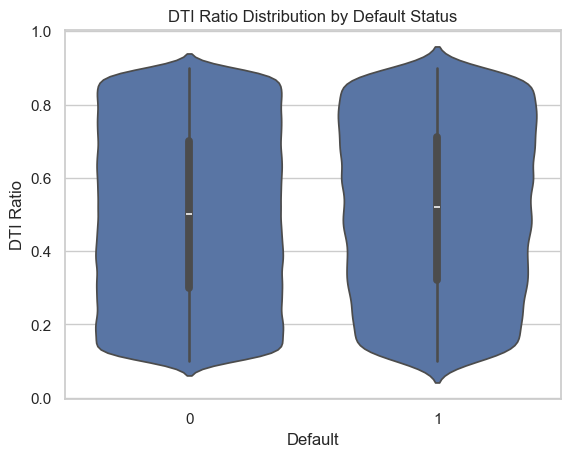

In [46]:
# 7. Debt-to-Income Ratio vs. Default
sns.violinplot(data=df, x='Default', y='DTIRatio')
plt.title("DTI Ratio Distribution by Default Status")
plt.xlabel("Default")
plt.ylabel("DTI Ratio")
plt.show()

**Outliers Detection**

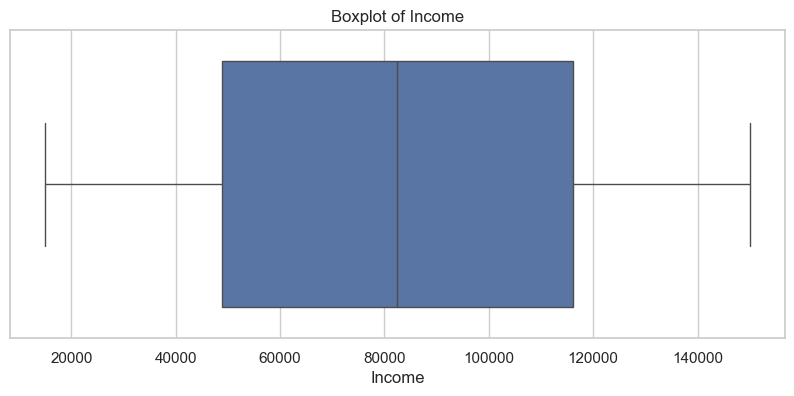

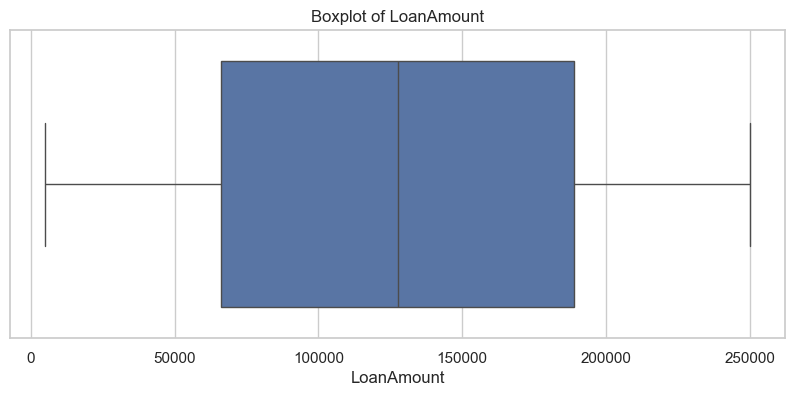

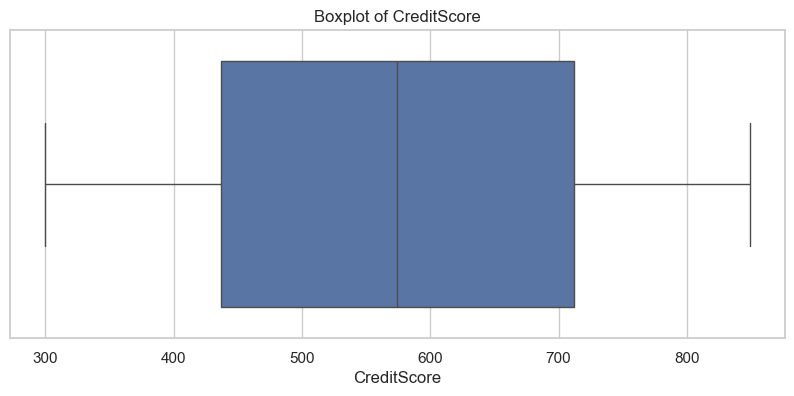

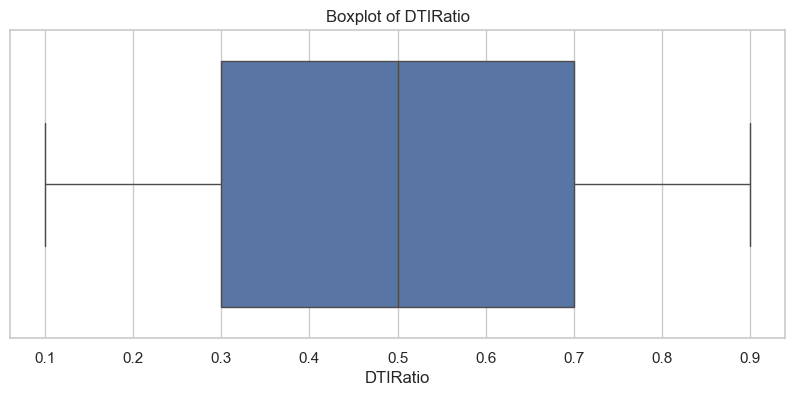

Outlier Detection using Z-score:
Income: 0 outliers detected
LoanAmount: 0 outliers detected
CreditScore: 0 outliers detected
DTIRatio: 0 outliers detected

Outlier Detection using IQR:
Income: 0 outliers detected (IQR)
LoanAmount: 0 outliers detected (IQR)
CreditScore: 0 outliers detected (IQR)
DTIRatio: 0 outliers detected (IQR)


In [49]:
# Choose important numerical columns for outlier detection
num_cols = ['Income', 'LoanAmount', 'CreditScore', 'DTIRatio']

# 1. Boxplot visualization
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

# 2. Outlier detection using Z-score
print("Outlier Detection using Z-score:")
for col in num_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > 3]
    print(f"{col}: {len(outliers)} outliers detected")

# 3. Outlier detection using IQR
print("\nOutlier Detection using IQR:")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected (IQR)")